In [41]:
import pandas as pd
import tensorflow as tf
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler
from tqdm import tqdm
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [42]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
y_train = np.expand_dims(y_train,axis=1)
y_test = np.expand_dims(y_test,axis=1)
print(y_train.shape,y_test.shape)

(404, 1) (102, 1)


In [43]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [44]:
def Boston_Housing_Quantile_Regression():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(20 ,activation='relu'))
    model.add(layers.Dense(1,activation=keras.activations.softsign))
    return model;

In [45]:
lrs = []
K1 = 0.
epochs = 1000
batch_size=4
q=0

In [46]:
def lr_schedule(epoch):
    global K1

    Kz = 0.
    
    for i in tqdm(range((len(x_train) - 1) // batch_size + 1)):
        start_i = i * batch_size
        end_i = start_i + batch_size
        xb = x_train[start_i:end_i]
    	
        tmp = np.array(func([xb]))
        activ = np.linalg.norm(tmp)
        
        if activ > Kz:
            Kz = activ
    # print("The value of K_z is ",Kz)
    K1 = (1/batch_size)*(Kz)*max(q,1-q)
    lr = 1 / K1
    lrs.append(lr)
    # print('Epoch', epoch, 'LR =', lr)
    return lr


In [47]:
lr_scheduler = LearningRateScheduler(lr_schedule)

In [48]:
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

In [ ]:
q = 0.95
model = Boston_Housing_Quantile_Regression()
func = K.function([model.layers[0].input], [model.layers[-2].output])
model.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.SGD())
history_Q95=model.fit(x_train, y_train, epochs = epochs, verbose=0, batch_size = batch_size,validation_data=(x_test,y_test),callbacks=[lr_scheduler])


In [ ]:
q = 0.05
model = Boston_Housing_Quantile_Regression()
model.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.SGD())
history_Q05=model.fit(x_train, y_train, epochs = epochs, verbose=0, batch_size = batch_size, validation_data=(x_test,y_test),callbacks=[lr_scheduler])


In [53]:
q = 0.05
model = Boston_Housing_Quantile_Regression()
model.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.SGD())
history_const_Q05 = model.fit(x_train, y_train, epochs = epochs, verbose=0, batch_size = batch_size, validation_data=(x_test,y_test))


In [55]:
q = 0.95
model = Boston_Housing_Quantile_Regression()
model.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.SGD())
history_const_Q95 = model.fit(x_train, y_train, epochs = epochs, verbose=0, batch_size = batch_size, validation_data=(x_test,y_test))


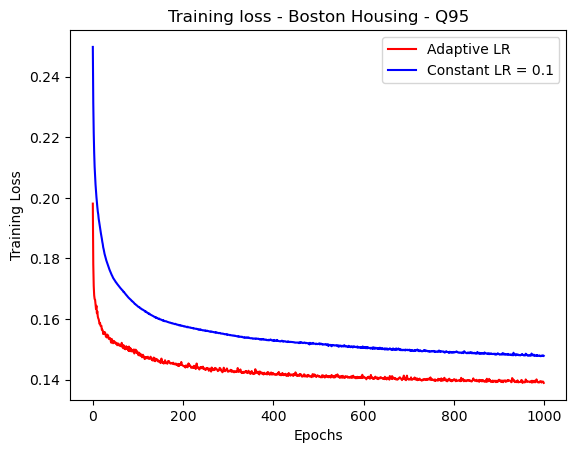

In [56]:

loss_adaptive = history_Q95.history['loss']
loss_constant = history_const_Q95.history['loss']
epochs = range(len(loss_adaptive))
plt.plot(epochs, loss_adaptive, 'r', label='Adaptive LR')
plt.plot(epochs, loss_constant, 'b',label='Constant LR = 0.1')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training loss - Boston Housing - Q95')
plt.savefig('Training_Loss-Boston_Housing-Q95.png')
plt.legend()



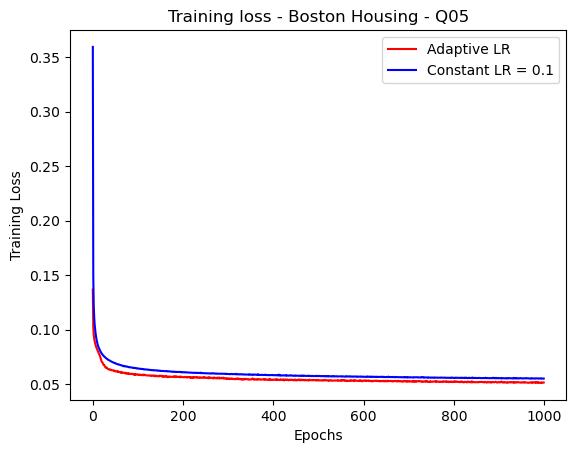

In [57]:
loss_adaptive = history_Q05.history['loss']
loss_constant = history_const_Q05.history['loss']
epochs = range(len(loss_adaptive))
plt.plot(epochs, loss_adaptive, 'r', label='Adaptive LR')
plt.plot(epochs, loss_constant, 'b',label='Constant LR = 0.1')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training loss - Boston Housing - Q05')
plt.savefig('Training_Loss-Boston_Housing-Q05.png')
plt.legend()



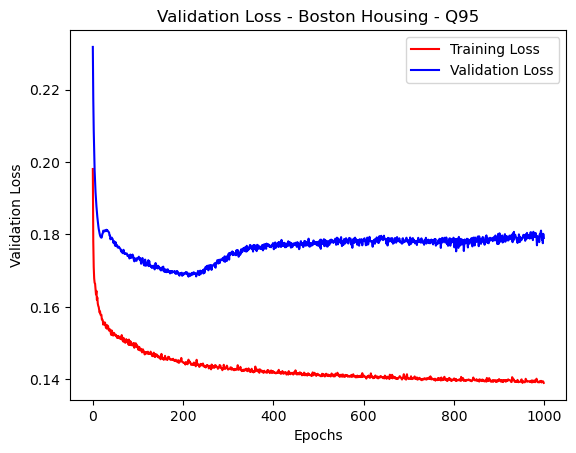

In [58]:
loss = history_Q95.history['loss']
val_loss = history_const_Q95.history['val_loss']
epochs = range(len(loss_adaptive))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss - Boston Housing - Q95')
plt.savefig('Validation_Loss-Boston_Housing-Q95-V.png')
plt.legend()



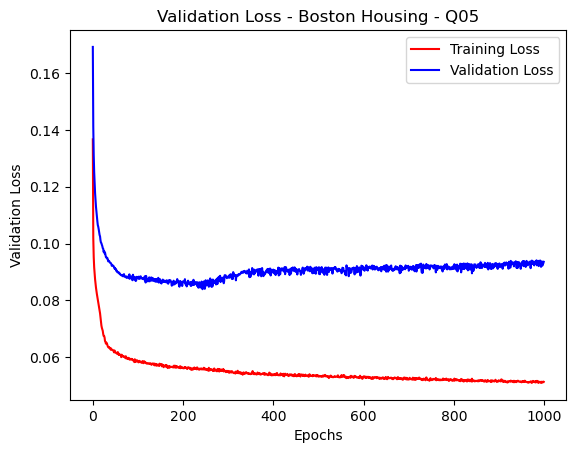

In [59]:
loss = history_Q05.history['loss']
val_loss = history_const_Q05.history['val_loss']
epochs = range(len(loss_adaptive))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss - Boston Housing - Q05')
plt.savefig('Validation_Loss-Boston_Housing-Q05-V.png')
plt.legend()